In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import random

In [12]:
try:
  data = pd.read_csv('Wholesale customers data.xls')
  data.drop(labels = ['Channel', 'Region'], axis = 1, inplace = True)
  print('Wholesale customers has {} samples with {} features each.'.format(*data.shape))
except:
  print('Error')

Wholesale customers has 440 samples with 6 features each.


In [17]:
data.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [13]:
data.isnull().sum()

,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [16]:
data.shape

(440, 6)

In [23]:
indices = []
for i in range(0,3):
  indices.append(random.randint(1,440))
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1107,11711,23596,955,9265,710
1,112151,29627,18148,16745,4948,8550
2,583,685,2216,469,954,18


<Axes: >

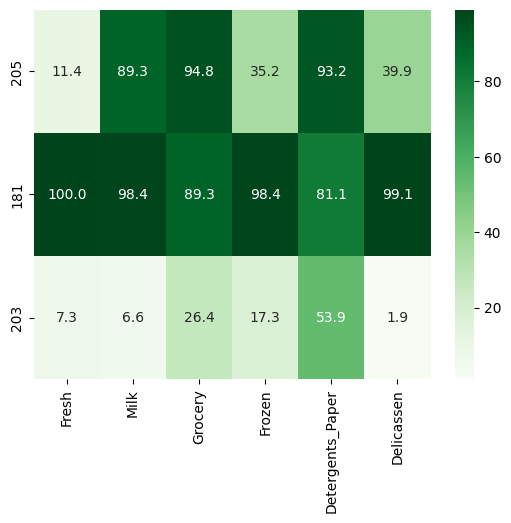

In [26]:
pct = 100. * data.rank(axis = 0, pct = True).iloc[indices].round(3)
sns.heatmap(pct, annot = True, vmin = 1, vmax = 99, fmt = '.1f', cmap = 'Greens')

<Axes: >

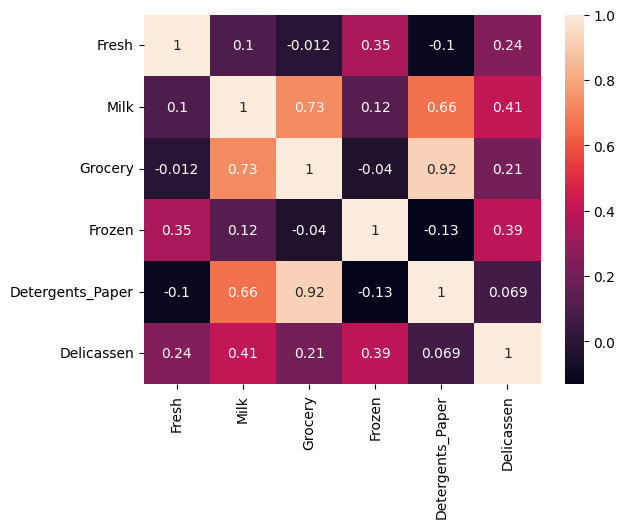

In [33]:
sns.heatmap(data.corr(), annot = True)

In [30]:
px.imshow(data)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
x = data.drop('Milk', axis = 1)
y = data['Milk']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

reg = DecisionTreeRegressor(max_depth = 6)
reg.fit(x_train, y_train)

score = reg.score(x_test, y_test)
print(score)

0.4519393916925598


array([[<Axes: xlabel='Fresh', ylabel='Fresh'>,
        <Axes: xlabel='Milk', ylabel='Fresh'>,
        <Axes: xlabel='Grocery', ylabel='Fresh'>,
        <Axes: xlabel='Frozen', ylabel='Fresh'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Fresh'>,
        <Axes: xlabel='Delicassen', ylabel='Fresh'>],
       [<Axes: xlabel='Fresh', ylabel='Milk'>,
        <Axes: xlabel='Milk', ylabel='Milk'>,
        <Axes: xlabel='Grocery', ylabel='Milk'>,
        <Axes: xlabel='Frozen', ylabel='Milk'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Milk'>,
        <Axes: xlabel='Delicassen', ylabel='Milk'>],
       [<Axes: xlabel='Fresh', ylabel='Grocery'>,
        <Axes: xlabel='Milk', ylabel='Grocery'>,
        <Axes: xlabel='Grocery', ylabel='Grocery'>,
        <Axes: xlabel='Frozen', ylabel='Grocery'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Grocery'>,
        <Axes: xlabel='Delicassen', ylabel='Grocery'>],
       [<Axes: xlabel='Fresh', ylabel='Frozen'>,
        <Axes: xlabel='M

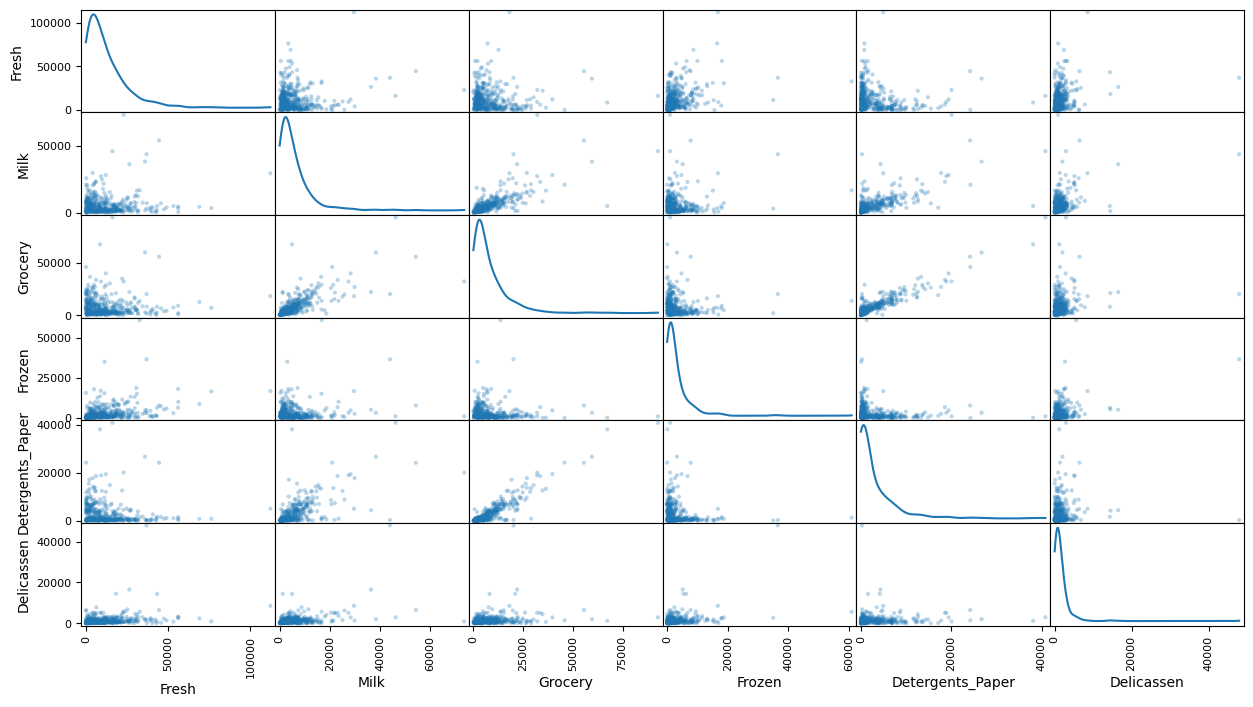

In [43]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (15,8), diagonal = 'kde')

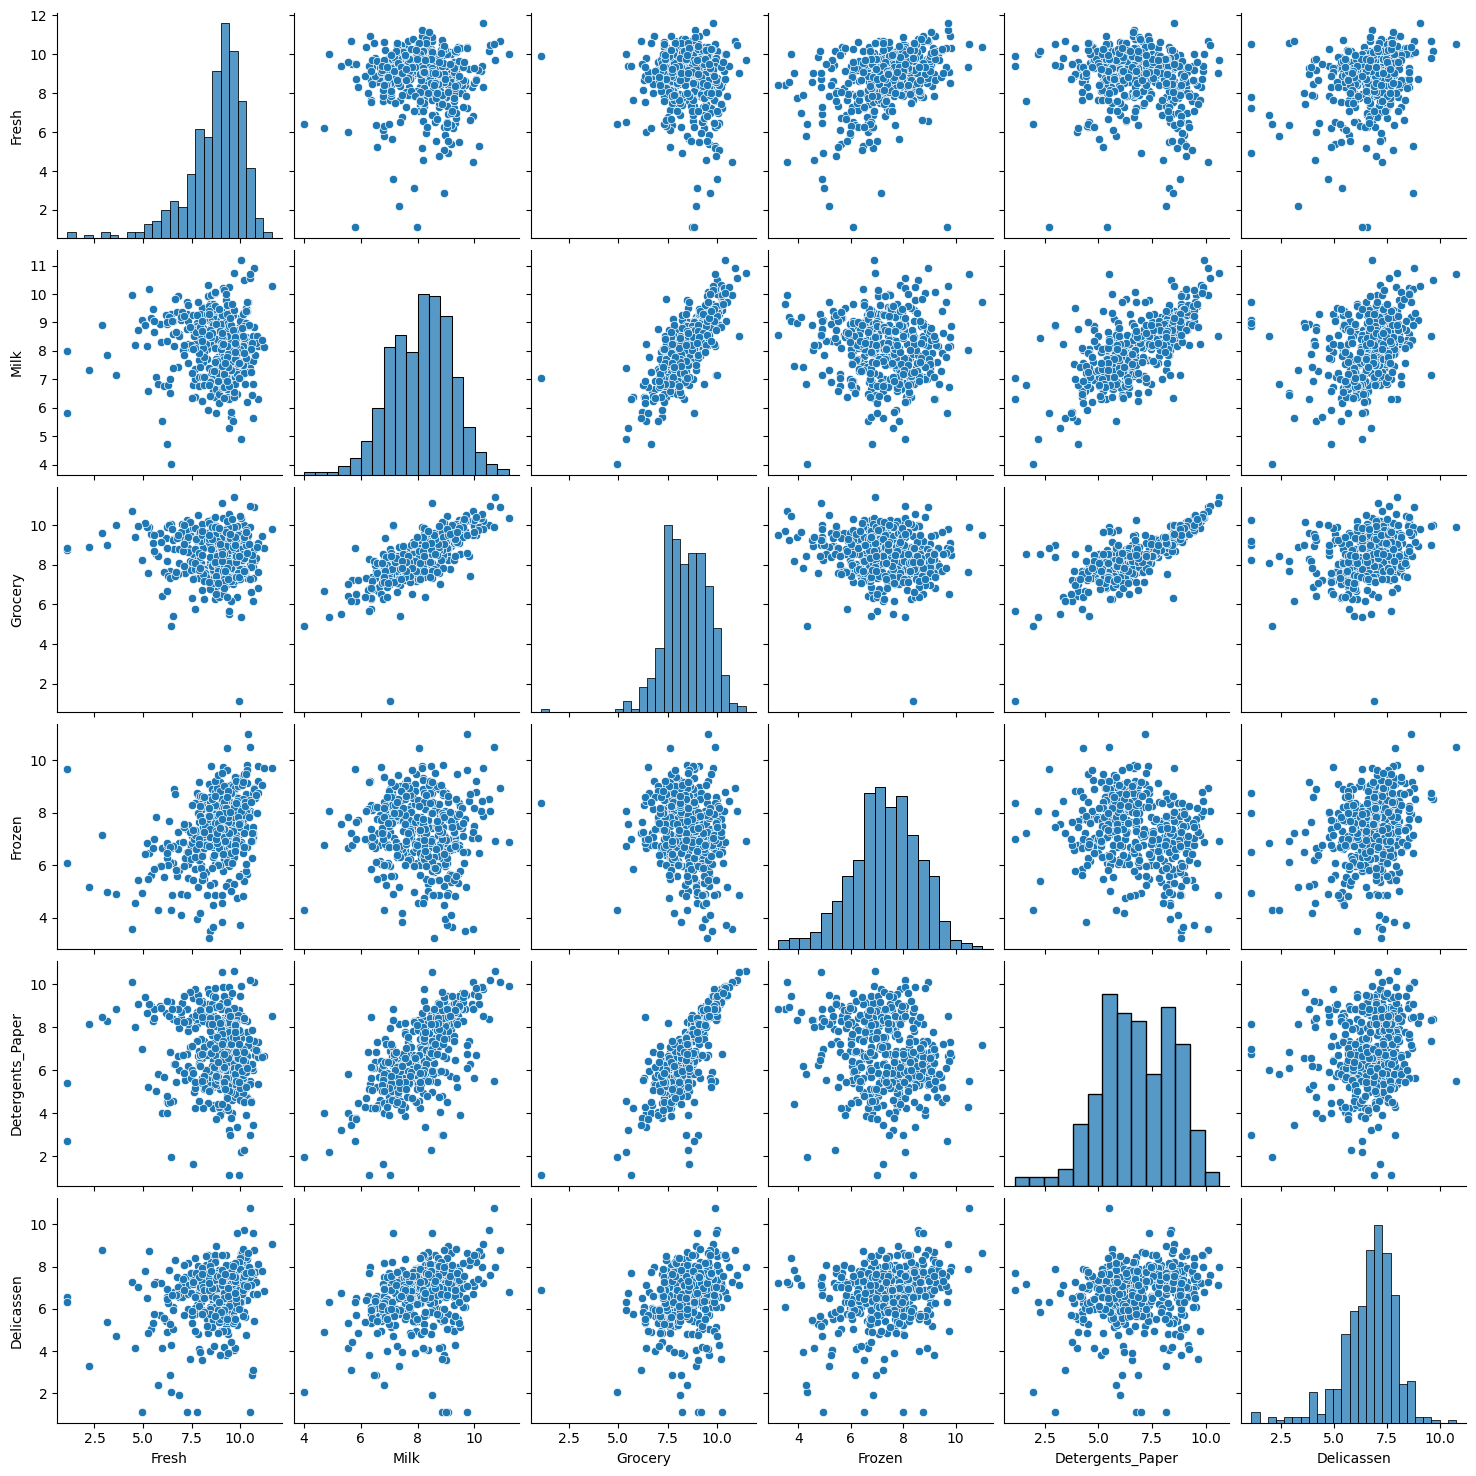

In [48]:
log_data = np.log(data.copy())
log_samples = np.log(samples)
sns.pairplot(log_data)

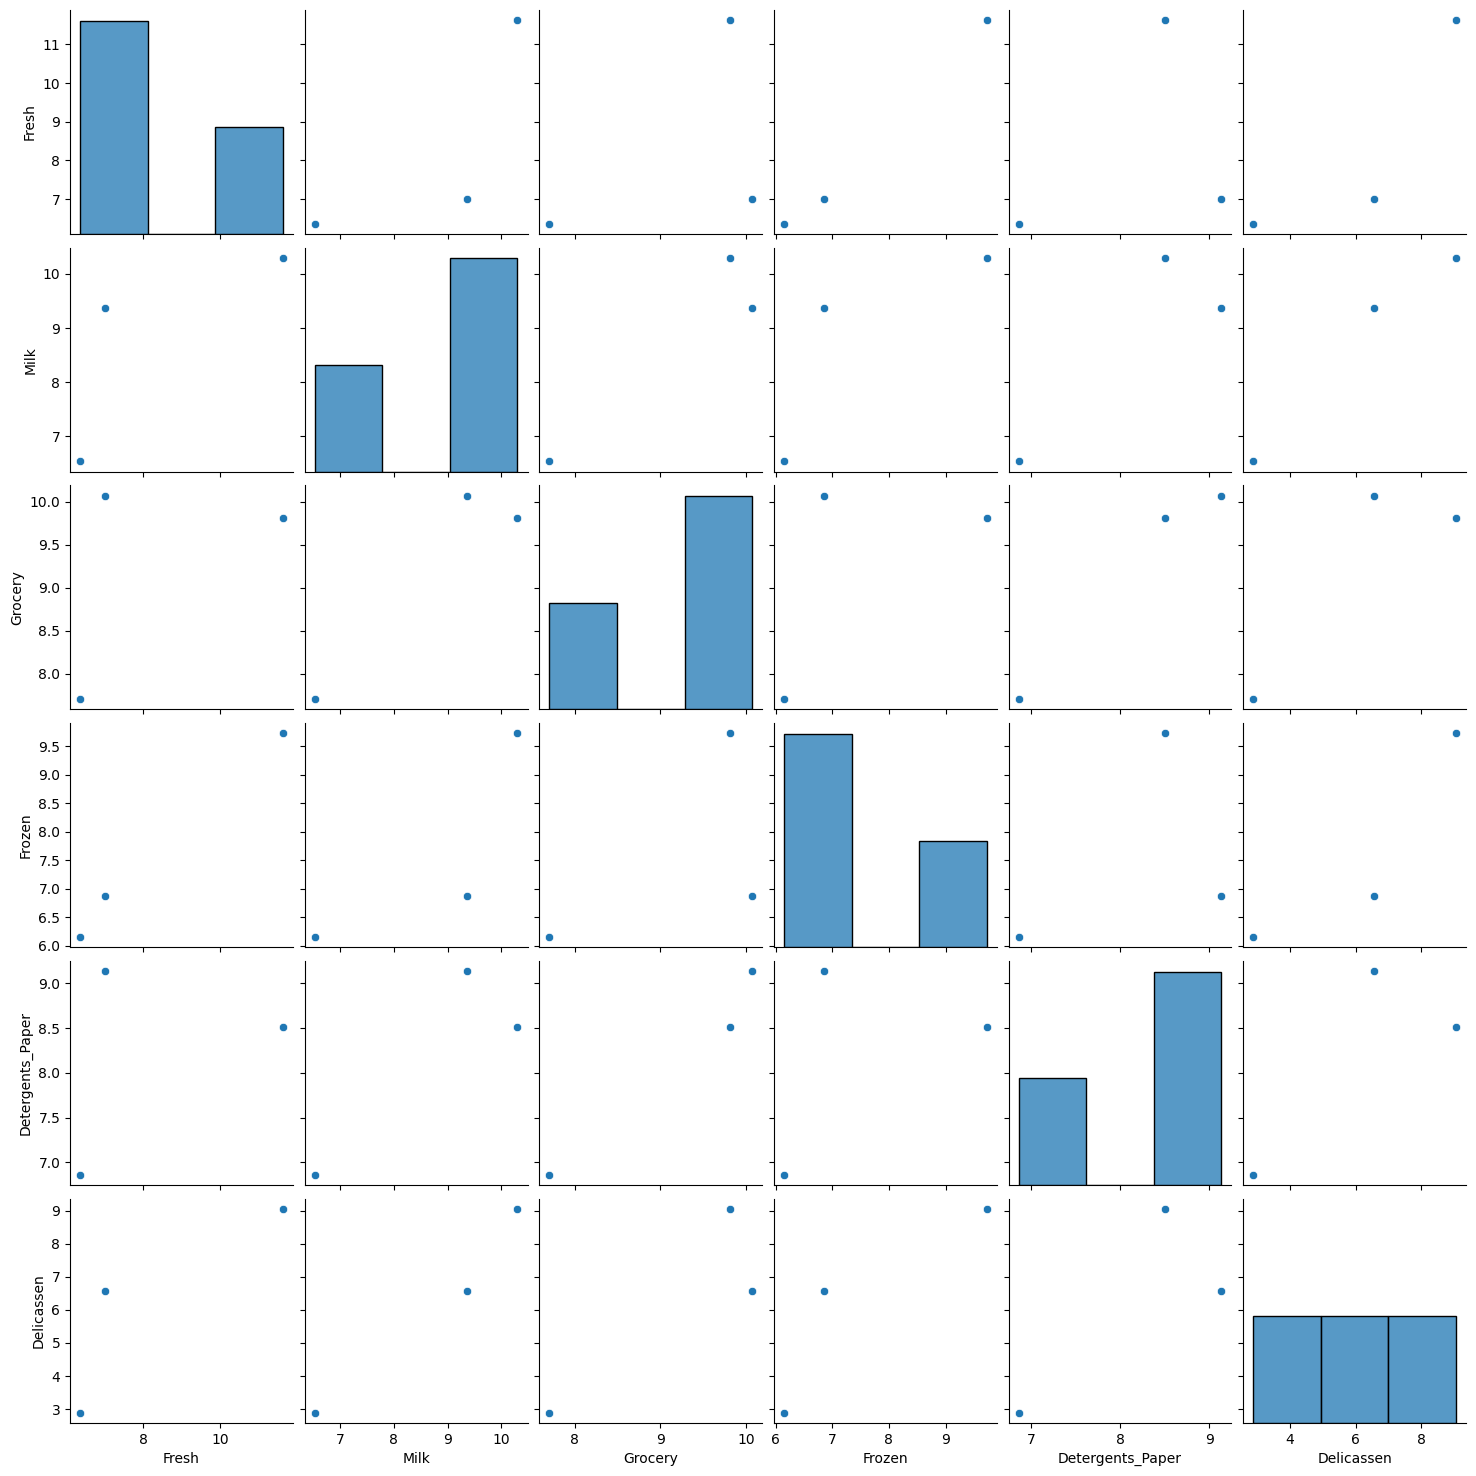

In [49]:
sns.pairplot(log_samples)

In [52]:
display(samples)
print()
print()
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1107,11711,23596,955,9265,710
1,112151,29627,18148,16745,4948,8550
2,583,685,2216,469,954,18


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,7.009409,9.368284,10.068832,6.861711,9.133999,6.565265
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [56]:
for features in log_data.keys():
  Q1 = np.percentile(log_data, 25)
  Q3 = np.percentile(log_data, 75)
  step = (Q3 - Q1) * 1.5

  print("The following data points are considered outliers for the feateure {}".format(features))
  print()
  print()
  display(log_data[~((log_data[features] >= Q1 - step) & (log_data[features] <= Q3 + step))])
outliers = [75, 338, 218, 177, 237]
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

The following data points are considered outliers for the feateure Fresh




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


The following data points are considered outliers for the feateure Milk




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


The following data points are considered outliers for the feateure Grocery




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


The following data points are considered outliers for the feateure Frozen




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


The following data points are considered outliers for the feateure Detergents_Paper




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
177,9.453992,8.899731,8.419139,7.468513,2.995732,7.875119
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
237,9.835851,8.252707,6.385194,8.441176,3.332205,7.102499
289,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


The following data points are considered outliers for the feateure Delicassen




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(good_data)
pca_samples = pca.transform(log_samples)

In [58]:
pca.components_

array([[-0.17353855,  0.4102361 ,  0.44343507, -0.16749906,  0.74191167,
         0.16268739],
       [ 0.64838456,  0.15240137,  0.07232577,  0.51936968,  0.02523034,
         0.5298668 ],
       [-0.56740808,  0.00192568, -0.08042228, -0.05609576, -0.26777319,
         0.77248133],
       [-0.47673857,  0.04143393,  0.0108964 ,  0.8344748 ,  0.10291155,
        -0.25287516],
       [-0.01423878,  0.72954517,  0.32884741, -0.03226218, -0.57142815,
        -0.17846427],
       [-0.00689134, -0.52394993,  0.82668448,  0.04078504, -0.20026756,
         0.01585047]])

In [59]:
pca.explained_variance_

array([4.63890783, 2.98788264, 1.14172653, 1.0193096 , 0.48671259,
       0.19653667])

In [60]:
pca_samples

array([[ 3.29959329, -1.03865387,  0.19717238,  0.80414886,  0.16986487,
         0.2091428 ],
       [ 2.22223501,  4.868432  , -0.4707714 ,  0.33431843,  0.51684868,
        -0.24413265],
       [-0.96798734, -4.43202568, -1.44438916,  1.06837915, -0.69210517,
         0.11359126]])